# Bike_Sharing_Assignment

In [1]:
# Filtering out the warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Required Libraries.

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Reading & Understanding the Data

### 1.1 Importing the CSV files

In [3]:
# Read the CSV file.

bike = pd.read_csv('day.csv')

### 1.2 Examining the bike_sharing_data

In [4]:
# Checking the top 5 rows of the bike_sharing_data

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Checking the shape of the bike_sharing_data

bike.shape

(730, 16)

In [6]:
# Checking size of the bike_sharing_data

bike.size

11680

In [7]:
# Checking other information of the bike_sharing_data

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Checking numerical columns data distribution statistics

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 2. Data Quality - Missing Value & Duplicate data Checking.

In [9]:
# Checking missing value in bike_sharing_data

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- After seeing above, we find that there is no missing value in the bike_sharing_data. 

In [10]:
# Checking Duplicate data in bike_sharing_data
# Creating a copy of original data for duplicate checking

bike_dup = bike

In [11]:
# Checking and dropping the entire duplicate row if any

bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

- So by seeing above, we find that after running drop duplicate command the shape is same as the original data.Hence we can conclude that there is no duplicate data

## 3. Analysing and cleaning of unused features.

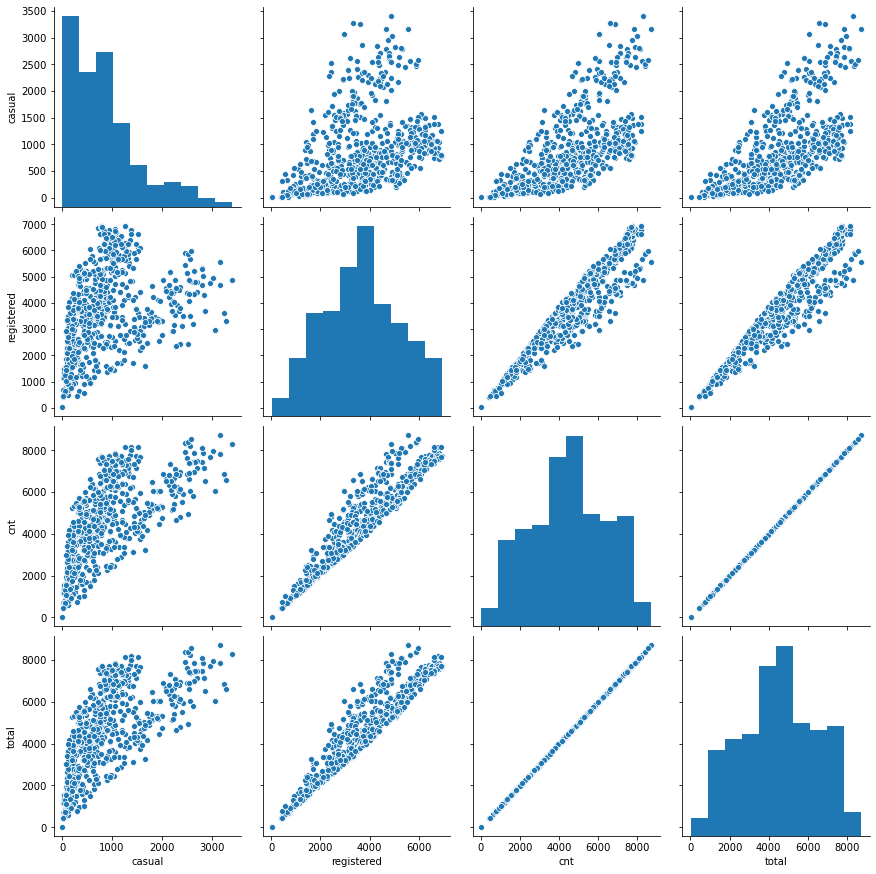

In [12]:
# Checking relationship between casual, registered and cnt columns

bike_cnt = bike[['casual','registered', 'cnt']]

# Creating a column which will show the value of casual + registered

bike_cnt['total'] = bike_cnt['casual'] + bike_cnt['registered']

sns.pairplot(bike_cnt, size=3)
plt.show()

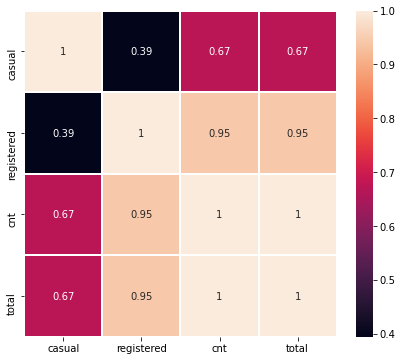

In [13]:
# Also checking correlation between the variables

plt.figure(figsize=(7,6))
sns.heatmap(bike_cnt.corr(), annot=True, linewidth=1)
plt.show()

#### Based on the analysis of the data the following variables can be removed from further analysis :- 
1. __instant__- Its only an index value.
2. __dteday__- Since we already have seperate columns for year and month, so we not required dteday columns.
3. __casual & registered__- Both this columns contains the count of bike booked by different categories of customers. From the pairplot as well as correlation heatmap we can concur that total bike rental value 'cnt'= 'casual' +'registered'. Since our objective is to find total count of bikes not by specific category, we will ignore these two columns.


In [14]:
# Dropping the unused columns

bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
bike.shape

(730, 12)

## 4. Encoding and visualization of bike_sharing_data

### 4.1 Encoding Categorical columns

- converting season, mnth, weathersit, weekday to categorical columns

In [15]:
# Converting season

bike.season.replace((1,2,3,4),('spring', 'summer', 'fall', 'winter'), inplace=True)
bike.season.value_counts(normalize=True)

fall      0.257534
summer    0.252055
spring    0.246575
winter    0.243836
Name: season, dtype: float64

In [16]:
# Converting mnth
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'),
                  inplace=True)
bike.mnth.value_counts(normalize=True)

Aug    0.084932
Jan    0.084932
Oct    0.084932
Jul    0.084932
Dec    0.084932
May    0.084932
Mar    0.084932
Nov    0.082192
Jun    0.082192
Sep    0.082192
Apr    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [17]:
# Converting weathersit

bike.weathersit.replace((1,2,3,4),('Clear', 'Mist', 'Light Snow', 'Heavy Rain'), inplace=True)
bike.weathersit.value_counts(normalize=True)

Clear         0.634247
Mist          0.336986
Light Snow    0.028767
Name: weathersit, dtype: float64

In [18]:
# Converting weekday
bike.weekday.replace((0,1,2,3,4,5,6),('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

Tuesday      0.143836
Monday       0.143836
Saturday     0.142466
Thursday     0.142466
Sunday       0.142466
Friday       0.142466
Wednesday    0.142466
Name: weekday, dtype: float64

### 4.2 Categorical Variables Analysis

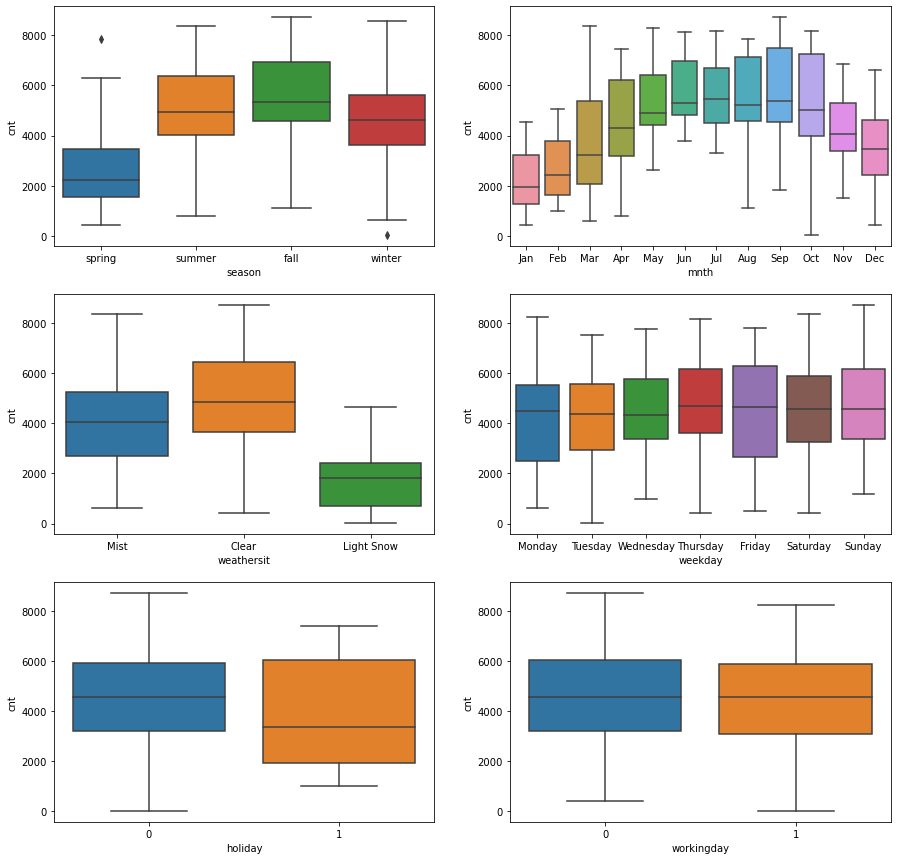

In [19]:
# Building boxplot of all categorical variables(before creating dummies) against the target variables 'cnt' 

plt.figure(figsize=(15, 15))
plt.subplot(3,2,1)
sns.boxplot(x='season',y='cnt', data=bike)
plt.subplot(3,2,2)
sns.boxplot(x='mnth',y='cnt', data=bike)
plt.subplot(3,2,3)
sns.boxplot(x='weathersit',y='cnt', data=bike)
plt.subplot(3,2,4)
sns.boxplot(x='weekday',y='cnt', data=bike)
plt.subplot(3,2,5)
sns.boxplot(x='holiday',y='cnt', data=bike)
plt.subplot(3,2,6)
sns.boxplot(x='workingday',y='cnt', data=bike)
plt.show()

In [20]:
# Generating function for statistics related to categorical variables

def categorical_stats(col):
    cat_df = bike.groupby(col)['cnt'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending= False)
    cat_df['sum_perc'] = cat_df['sum']/bike.cnt.sum()*100
    cat_df['count_perc'] = cat_df['count']/bike.cnt.count()*100
    return round(cat_df, 2)

In [21]:
# Generating function for plots related to Categorical variables

def categorical_plot(col,x,y):
    plt.figure(figsize=(x,y))
    plt.subplot(1,2,1)
    sns.barplot(col, 'cnt', data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col, 'cnt', data=bike, hue='yr', palette= 'Paired')
    plt.legend(labels=['2018', '2019'])
    return

#### 4.2.1 season

In [22]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
fall,1061129,5644.30,188,32.24,25.75
summer,918589,4992.33,184,27.91,25.21
winter,841613,4728.16,178,25.57,24.38
spring,469514,2608.41,180,14.27,24.66


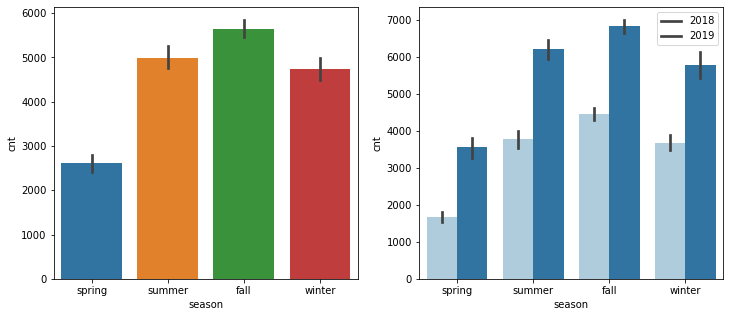

In [23]:
categorical_plot('season', 12,5)

- Almost 32% of the bike booking were happening in 'fall' with a median of over 5000 bookings(for two years).
- In summer with 27% and winter with 25% of total booking.
- It indicates that the season can be a good predictor of the dependent variables.

#### 4.2.2 Month

In [24]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


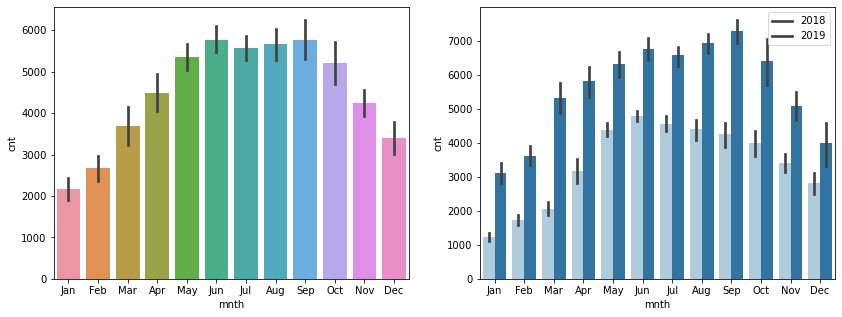

In [25]:
categorical_plot('mnth',14,5)

- Almost 10% of the bike booking was happening in the months from 'May to Sep' with a median of over 5000 bookings per month.
- It indicates that 'mnth' can be a good predictor for the dependent variable.

#### 4.2.3 Weathersit

In [26]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Mist,995024,4044.81,246,30.24,33.70
Light Snow,37869,1803.29,21,1.15,2.88


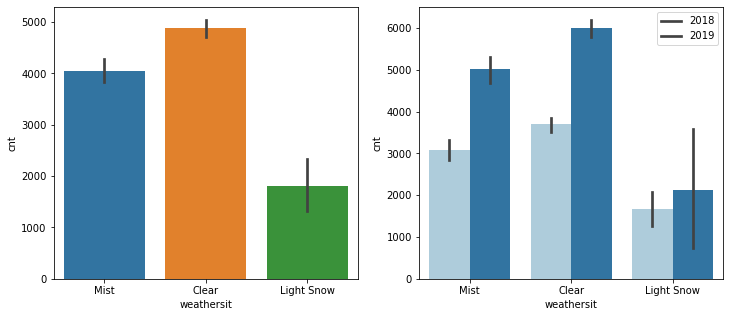

In [27]:
categorical_plot('weathersit',12,5)

- Almost 68% of the bike booking were happening in 'Clear' weather with a median of over 4500 bookings(for two years).
- In Mist with 30% of total booking.
- It indicates that the weathersit can be a good predictor of the dependent variables.

#### 4.2.4 Weekday

In [28]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Thursday,487923,4691.57,104,14.83,14.25
Sunday,485235,4665.72,104,14.74,14.25
Saturday,481176,4626.69,104,14.62,14.25
Friday,478132,4597.42,104,14.53,14.25
Wednesday,462276,4444.96,104,14.05,14.25
Tuesday,448822,4274.50,105,13.64,14.38
Monday,447281,4259.82,105,13.59,14.38


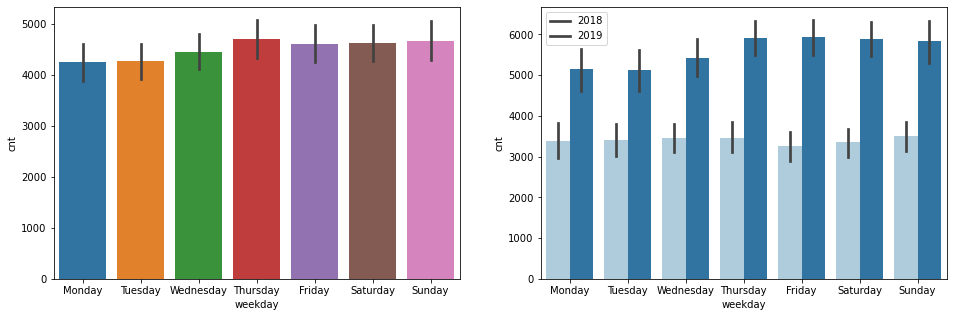

In [29]:
categorical_plot('weekday',16,5)

- Weekday variable shows the very close trend between 13.5% - 15.0% of total booking on all days of the week with the mean between 4000 to 5000 


#### 4.2.5  Holiday

In [30]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


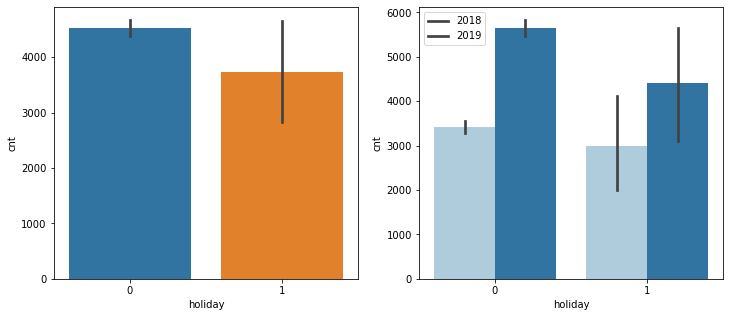

In [31]:
categorical_plot('holiday', 12,5)

#### 4.2.6 working day

In [32]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


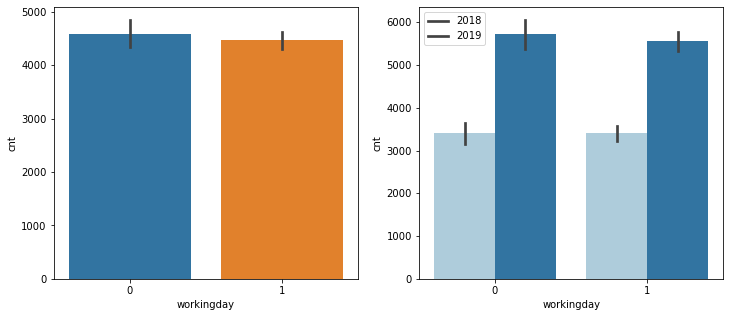

In [33]:
categorical_plot('workingday',12,5)

- Almost 68% of the bike booking were happening in 'working day'  with a median of over 4000 bookings(for two years).
- It indicates that the 'workingday' can be a good predictor of the dependent variables.

#### 4.2.7 Year

In [34]:
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


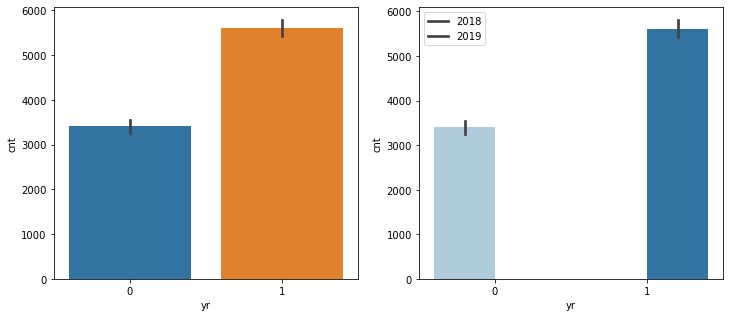

In [35]:
categorical_plot('yr', 12,5)

- Bike rental demand grown up from 2018 to 2019

### 4.3 Numerical Variables Analysis

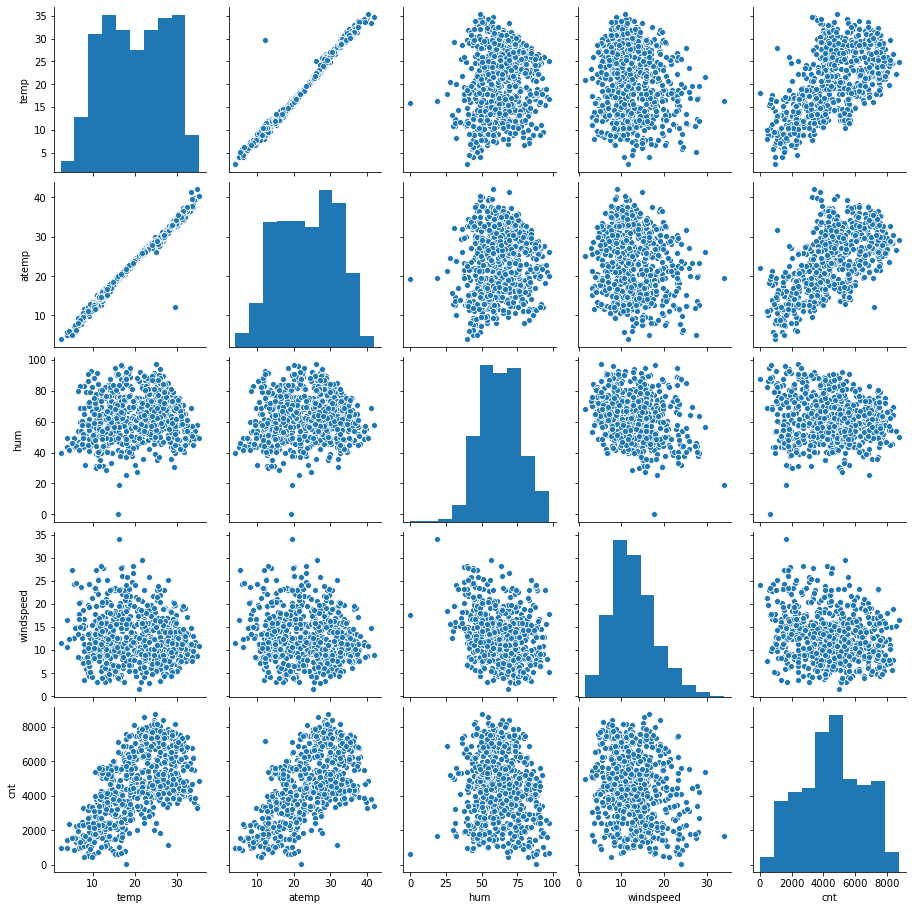

In [36]:
# Generating pairplot to check the relationship between numeric variables 

bike_num = bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
sns.pairplot(bike_num)
plt.show()

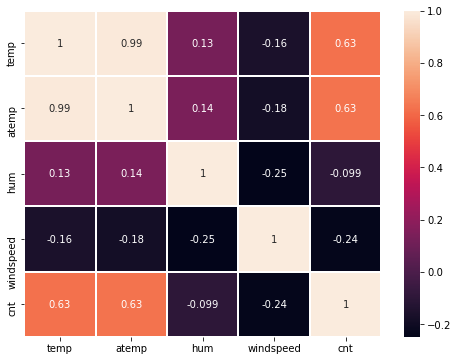

In [37]:
# Checking correlation of the numeric variables

plt.figure(figsize = (8,6))
sns.heatmap(bike_num.corr(), annot = True, linewidth = 1)
plt.show()

- There is linear relationship between temp and atemp.
- We will decide which parameters to keep based on VIF and p-value w.r.t other variables.

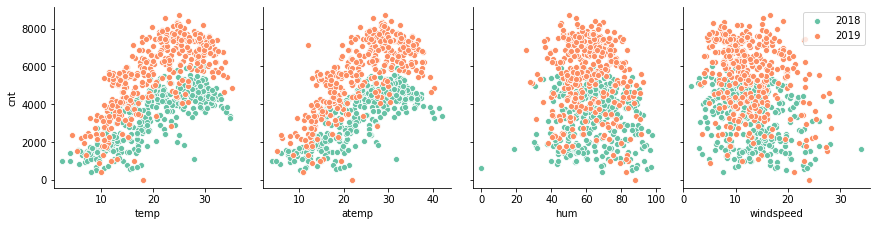

In [38]:
# Checking the impact of year against the numerical variable

ax= sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars = ['cnt'], data = bike, hue= 'yr', palette= 'Set2', size=3)
ax._legend.remove()
plt.legend(labels=['2018','2019'])
plt.show()

- temp, atemp, hum and windspeed all these parameters have increased value in 2019 as compared to 2018.
- Year may become a key parameter in the model.

## 5. Data Preparation

### 5.1 Dummy Variable Creation

- Creating dummy variables for 'season', 'weathersit', 'mnth', 'weekday'

In [39]:
# Dummy variable for season

Season = pd.get_dummies(bike['season'], drop_first=True)
Season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [40]:
# Dummy variable for mnth(month)

Month = pd.get_dummies(bike['mnth'], drop_first=True)
Month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [41]:
# Dummy variable for weathersit

Weather = pd.get_dummies(bike['weathersit'], drop_first=True)
Weather.head()

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [42]:
# Dummy variable for weekday

Weekday = pd.get_dummies(bike['weekday'], drop_first=True)
Weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


### 5.2 Merging the dataframe

In [43]:
# Creating a new dataframe where season, month, weathersit and weekday data is being added

bike_new = pd.concat([bike, Season, Month, Weather, Weekday], axis=1)
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [44]:
bike_new.shape

(730, 34)

In [45]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  Jul         730 non-null    u

### 5.3 Removing unnecessary columns

In [46]:
# Removing unnecessary columns season, mnth, weathersit and weekday

bike_new.drop(['season', 'mnth', 'weathersit', 'weekday'], axis=1, inplace= True)
bike_new.shape

(730, 30)

In [47]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Aug         730 non-null    uint8  
 12  Dec         730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  Jan         730 non-null    uint8  
 15  Jul         730 non-null    uint8  
 16  Jun         730 non-null    uint8  
 17  Mar         730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  Nov         730 non-null    u

- Now all the 30 columns are having numeric value and data is ready for splitting into train and test dataframe.

## 6. Splitting the Data into Train & Test Dataset

### 6.1 Split into Train & Test

In [48]:
bike_train, bike_test= train_test_split(bike_new, train_size=0.7, random_state= 333)

In [49]:
bike_train.shape

(510, 30)

In [50]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.690196,20.218078,23.590696,62.340743,12.771365,4494.103922,0.250980,0.245098,...,0.084314,0.082353,0.025490,0.343137,0.141176,0.143137,0.145098,0.139216,0.152941,0.131373
std,0.500487,0.151726,0.462867,7.500110,8.138271,14.418728,5.205888,1948.315655,0.434003,0.430568,...,0.278131,0.275172,0.157763,0.475223,0.348545,0.350557,0.352545,0.346511,0.360284,0.338139
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717924,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327087,72.958300,15.624869,5962.750000,0.750000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
bike_test.shape

(220, 30)

In [52]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,20.553817,24.040727,63.749086,12.745665,4540.236364,0.236364,0.268182,...,0.086364,0.081818,0.036364,0.322727,0.150000,0.140909,0.136364,0.150000,0.122727,0.168182
std,0.501120,0.198531,0.463173,7.533926,8.188064,13.790510,5.184271,1911.199159,0.425817,0.444023,...,0.281541,0.274713,0.187620,0.468586,0.357886,0.348721,0.343957,0.357886,0.328872,0.374881
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Based on the split(70% - 30%) between train and test dataset we got 510 rows in train dataset and 220 rows in test dataset.

### 6.2 Scaling the bike_sharing_Data

In [53]:
# Scaling through MinMaxScaler

scaler= MinMaxScaler()

In [54]:
# Dataframe before scalling

bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,0,1,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,0,0,0,0,0,0,0,1
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,0,1,1,0,0,0,0,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,0,0,0,1,0
502,1,0,0,23.130847,27.55605,52.3333,9.166739,7639,0,1,...,0,0,0,0,0,1,0,0,0,0


In [55]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars= ['temp', 'hum', 'windspeed', 'cnt']
bike_train[num_vars]= scaler.fit_transform(bike_train[num_vars])

In [56]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,0.416433,19.56980,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,0,1,0,0,0
212,0,0,1,0.887856,35.16460,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,0,0,0,0,0,1
714,1,0,1,0.378013,18.49690,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,1,0,0,0,0,0
8,0,0,1,0.098690,5.80875,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,0,0,1,0
502,1,0,0,0.629300,27.55605,0.543723,0.235894,0.876323,0,1,...,0,0,0,0,0,1,0,0,0,0


In [57]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.690196,0.540777,23.590696,0.647696,0.346806,0.514508,0.250980,0.245098,...,0.084314,0.082353,0.025490,0.343137,0.141176,0.143137,0.145098,0.139216,0.152941,0.131373
std,0.500487,0.151726,0.462867,0.227939,8.138271,0.149805,0.160182,0.224150,0.434003,0.430568,...,0.278131,0.275172,0.157763,0.475223,0.348545,0.350557,0.352545,0.346511,0.360284,0.338139
min,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,16.744800,0.536147,0.231105,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,23.973425,0.646584,0.326920,0.516107,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,30.327087,0.758008,0.434607,0.683473,0.750000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 7.  Building the Linear Model

#### 7.1 Dividing into X_train and y_train

In [58]:
X_train = bike_train
y_train = bike_train.pop('cnt')

#### 7.2 RFE

In [59]:

lm= LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
# Running RFE with the O/P number of the variable equal to 15

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [61]:
# Checking which parameters have been selected in that list of 15

list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1),
 ('Aug', False, 3),
 ('Dec', True, 1),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10)]

In [62]:
# Storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'Dec', 'Jul',
       'Mar', 'Nov', 'Sep', 'Light Snow', 'Mist', 'Saturday', 'Sunday'],
      dtype='object')

In [63]:
# Checking which columns have been eleminated

X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'atemp', 'summer', 'Aug', 'Feb', 'Jan', 'Jun',
       'May', 'Oct', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [64]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head(3)

,yr,temp,hum,windspeed,spring,winter,Dec,Jul,Mar,Nov,Sep,Light Snow,Mist,Saturday,Sunday
650,1,0.416433,0.513852,0.255118,0,1,0,0,0,0,0,0,0,0,1
212,0,0.887856,0.572294,0.276919,0,0,0,0,0,0,0,0,0,0,0
714,1,0.378013,0.871429,0.161523,0,1,1,0,0,0,0,0,1,0,0


#### 7.3 Building Models using Statsmodel

#### Model 1

In [65]:
# Building model using statsmodel

X_train_rfe1 = sm.add_constant(X_train_rfe)

In [66]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [67]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          6.20e-184
Time:                        22:06:26   Log-Likelihood:                 503.14
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     494   BIC:                            -906.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3557      0.033     10.696      0.0

In [68]:
# VIF calculation

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
2,hum,22.50
1,temp,16.01
3,windspeed,5.03
5,winter,2.74
4,spring,2.70
12,Mist,2.28
0,yr,2.05
9,Nov,1.83
7,Jul,1.42
6,Dec,1.41


In [69]:
X_train_rfe1.head()

,const,yr,temp,hum,windspeed,spring,winter,Dec,Jul,Mar,Nov,Sep,Light Snow,Mist,Saturday,Sunday
650,1.0,1,0.416433,0.513852,0.255118,0,1,0,0,0,0,0,0,0,0,1
212,1.0,0,0.887856,0.572294,0.276919,0,0,0,0,0,0,0,0,0,0,0
714,1.0,1,0.378013,0.871429,0.161523,0,1,1,0,0,0,0,0,1,0,0
8,1.0,0,0.098690,0.451083,0.700017,1,0,0,0,0,0,0,0,0,0,0
502,1.0,1,0.629300,0.543723,0.235894,0,0,0,0,0,0,0,0,0,1,0


In [70]:
# column 'hum' has a very high VIF so we drop it

X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)

- As 'hum' variable has the highest VIF value(22.50), So we drop it.

#### Model 2

In [71]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [72]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [73]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     175.2
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          2.00e-181
Time:                        22:06:27   Log-Likelihood:                 494.44
No. Observations:                 510   AIC:                            -958.9
Df Residuals:                     495   BIC:                            -895.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2662      0.026     10.370      0.0

In [74]:
# VIF calculation

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
1,temp,5.24
2,windspeed,4.99
4,winter,2.36
0,yr,2.05
3,spring,1.90
8,Nov,1.80
11,Mist,1.54
6,Jul,1.38
5,Dec,1.34
7,Mar,1.22


In [75]:
# column 'temp' has a very high VIF so we drop it

X_train_rfe = X_train_rfe.drop(['temp'], axis = 1)

- As 'temp' variable has the highest VIF value(5.24), So we drop it.

#### Model 3

In [76]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     129.3
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          6.98e-150
Time:                        22:06:27   Log-Likelihood:                 416.63
No. Observations:                 510   AIC:                            -805.3
Df Residuals:                     496   BIC:                            -746.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5608      0.015     37.264      0.0

In [77]:
# VIF calculation

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
1,windspeed,2.89
3,winter,2.35
0,yr,1.87
7,Nov,1.77
2,spring,1.73
10,Mist,1.48
4,Dec,1.34
6,Mar,1.22
11,Saturday,1.20
12,Sunday,1.20


In [78]:
X_train_rfe.columns

Index(['yr', 'windspeed', 'spring', 'winter', 'Dec', 'Jul', 'Mar', 'Nov',
       'Sep', 'Light Snow', 'Mist', 'Saturday', 'Sunday'],
      dtype='object')

In [79]:
# column 'windspeed' has a very high VIF so we drop it

X_train_rfe = X_train_rfe.drop(['windspeed'], axis = 1)

- As 'windspeed' has a very high VIF > 2, so we drop it

#### Model 4

In [80]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     127.8
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          2.43e-143
Time:                        22:06:28   Log-Likelihood:                 398.50
No. Observations:                 510   AIC:                            -771.0
Df Residuals:                     497   BIC:                            -716.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4942      0.011     46.587      0.0

In [81]:
# winter has a very high p-value, so we drop it.
X_train_rfe = X_train_rfe.drop(['winter'], axis=1)

- As 'winter' variable has a very high p-value which means it is insignificant so we drop it.

#### Model 5

In [82]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     139.3
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          3.69e-144
Time:                        22:06:28   Log-Likelihood:                 397.87
No. Observations:                 510   AIC:                            -771.7
Df Residuals:                     498   BIC:                            -720.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4976      0.010     49.001      0.0

In [83]:
# 'sunday' has a very high p-value, so we drop it.
X_train_rfe = X_train_rfe.drop(['Sunday'], axis=1)

- As 'sunday' variable has a very high p-value which means it is insignificant so we drop it.

#### Model 6

In [84]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          9.03e-145
Time:                        22:06:28   Log-Likelihood:                 396.71
No. Observations:                 510   AIC:                            -771.4
Df Residuals:                     499   BIC:                            -724.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5006      0.010     50.242      0.0

In [85]:
# 'Mar' has a very high p-value, so we drop it.
X_train_rfe = X_train_rfe.drop(['Mar'], axis=1)

- As 'Mar' variable has a very high p-value which means it is insignificant so we drop it.

#### Model 7

In [86]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     168.4
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          3.37e-145
Time:                        22:06:28   Log-Likelihood:                 395.06
No. Observations:                 510   AIC:                            -770.1
Df Residuals:                     500   BIC:                            -727.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5021      0.010     50.428      0.0

In [87]:
# 'Saturday' has a very high p-value, so we drop it.
X_train_rfe = X_train_rfe.drop(['Saturday'], axis=1)

- As 'Saturday' variable has a very high p-value which means it is insignificant so we drop it.

#### Model 8

In [88]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          1.72e-145
Time:                        22:06:29   Log-Likelihood:                 393.03
No. Observations:                 510   AIC:                            -768.1
Df Residuals:                     501   BIC:                            -729.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5059      0.010     51.626      0.0

In [89]:
# 'Jul' has a very high p-value, so we drop it.
X_train_rfe = X_train_rfe.drop(['Jul'], axis=1)

- As 'Jul' variable has a very high p-value which means it is insignificant so we drop it.

#### Model 9

In [90]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     212.9
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          8.32e-146
Time:                        22:06:29   Log-Likelihood:                 390.99
No. Observations:                 510   AIC:                            -766.0
Df Residuals:                     502   BIC:                            -732.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5122      0.009     55.025      0.0

In [91]:
# VIF calculation

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
0,yr,1.40
6,Mist,1.29
1,spring,1.22
2,Dec,1.09
4,Sep,1.09
3,Nov,1.08
5,Light Snow,1.02


In [92]:
lm8.params

const         0.512188
yr            0.242501
spring       -0.285855
Dec          -0.089947
Nov          -0.121769
Sep           0.084359
Light Snow   -0.345473
Mist         -0.082822
dtype: float64

**Conclusion for 'Final Model' after seeing above results:-**
- This model looks good, as there seems to be very low Multicollinearity between the predictors.
- P-value for all the predictors seems to be significant. 
- For now, we will consider this as our Final Model unless the Test data metrics are not significantly close to this number

**F-Statistics**
- F-Statistics is used for testing the overall significance of the Model.
- Higher the F-Statistics, the more significant the Model is.
- F-Statistics : 212.9
- Prob (F-Statistics) : 8.32e-146
- F-Statistics value 0f 212.9 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

### 8. Residual Analysis

**8.1. Distribution of the error terms**
- we need to check if the error terms are also normally distributed (which is infact, one of the major assumption of linear regression.

In [93]:
# Predict values

y_train_pred = lm8.predict(X_train_rfe8)

In [94]:
# Calculating Residual

res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

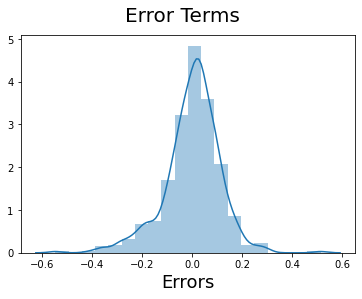

In [95]:
# Checking Assumption of Normality, Plotting histogram of the error terms

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize= 20)
plt.xlabel('Errors', fontsize = 18)

In [96]:
# Checking columns

X_train_rfe8.columns

Index(['const', 'yr', 'spring', 'Dec', 'Nov', 'Sep', 'Light Snow', 'Mist'], dtype='object')

In [97]:
print(X_train_rfe8.shape)
print(res.shape)

(510, 8)
(510,)


#### 8.2. Scaling the test Data

In [98]:
# Scaling the Test Data

num_vars = ['temp', 'hum', 'windspeed', 'cnt']
bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
22,0,0,1,0.000000,4.941955,0.214684,0.517945,0.060844,1,0,...,0,0,0,0,0,0,0,0,1,0
468,1,0,0,0.529437,24.399800,0.311966,0.365150,0.881481,0,1,...,0,0,0,0,0,0,1,0,0,0
553,1,0,1,0.964569,39.519800,0.415751,0.185998,0.528077,0,0,...,0,0,0,0,1,0,0,0,0,0
504,1,0,1,0.696625,29.198350,0.352259,0.539258,0.839523,0,1,...,0,0,0,0,1,0,0,0,0,0
353,0,0,1,0.384393,19.822700,0.447497,0.010221,0.411205,0,0,...,0,0,0,1,0,0,0,1,0,0


In [99]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,0.537824,24.040727,0.509144,0.363275,0.511375,0.236364,0.268182,...,0.086364,0.081818,0.036364,0.322727,0.150000,0.140909,0.136364,0.150000,0.122727,0.168182
std,0.501120,0.198531,0.463173,0.244145,8.188064,0.202059,0.212324,0.242261,0.425817,0.444023,...,0.281541,0.274713,0.187620,0.468586,0.357886,0.348721,0.343957,0.357886,0.328872,0.374881
min,0.000000,0.000000,0.000000,0.000000,4.941955,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.331585,17.366525,0.355464,0.211583,0.340601,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544384,24.762725,0.508242,0.338721,0.518127,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750601,30.903325,0.649573,0.481946,0.691311,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,41.318550,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 8.3. Dividing X_test and y_test

In [100]:
X_test = bike_test
y_test = bike_test.pop('cnt')

In [101]:
# Selecting the variables that were part of final model

col1 = X_train_rfe.columns
X_test = X_test[col1]

# Adding constant variables to test dataframe
X_test_rfe8 = sm.add_constant(X_test)
X_test_rfe8.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   yr          220 non-null    int64  
 2   spring      220 non-null    uint8  
 3   Dec         220 non-null    uint8  
 4   Nov         220 non-null    uint8  
 5   Sep         220 non-null    uint8  
 6   Light Snow  220 non-null    uint8  
 7   Mist        220 non-null    uint8  
dtypes: float64(1), int64(1), uint8(6)
memory usage: 6.4 KB


In [102]:
# Making predictions using the final model(lm8)

y_pred= lm8.predict(X_test_rfe8)

### 9. Model Evaluation

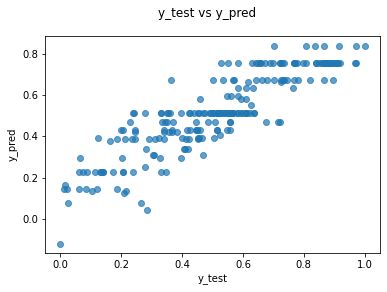

In [103]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha =0.7)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

#### 9.1 Calculating R-Squared and Adjusted R-Squared for the selected Model

In [104]:
# R-Squared value calculation

r2 = round(r2_score(y_test, y_pred), 4)
r2

0.7765

In [105]:
# Adjusted R-Squared value Calculation

n= X_test.shape[0]         # n is the number of rows
p = X_test.shape[1]        # p is predictors

adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7691

**Model Train & Test R2 Statistics Comparison**
- R2 value for train dataset(74.8 %) and R2 value for test dataset(77.6 %)
- R2-Squared value for train dataset(74.4 %) and R2-Squared value for test dataset(76.9 %)

#### 9.2 Calculating RMSE for the Model

In [106]:
RMSE = round(mean_squared_error(y_test, y_pred),4)
RMSE

0.0131

#### 9.3 Calculating Mean Absolute Error for the Model

In [107]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.093

**Conclusion**
- The Root Mean Squared Error value for the test dataset based on final model is 0.0131 and Mean Absolute Error is 0.093, which indicates that the model is really good.